In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df= pd.read_csv('Telco-Customer-Churn 1.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
columns = df.columns
print(columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [9]:
df[df['Churn'] == 'Yes'].count()

customerID          1869
gender              1869
SeniorCitizen       1869
Partner             1869
Dependents          1869
tenure              1869
PhoneService        1869
MultipleLines       1869
InternetService     1869
OnlineSecurity      1869
OnlineBackup        1869
DeviceProtection    1869
TechSupport         1869
StreamingTV         1869
StreamingMovies     1869
Contract            1869
PaperlessBilling    1869
PaymentMethod       1869
MonthlyCharges      1869
TotalCharges        1869
Churn               1869
dtype: int64

In [10]:
churned_cnt_based_on_is= df[df['Churn'] == 'Yes'].groupby('InternetService').size().reset_index(name='Churnedcount')
churned_cnt_based_on_is.head()

,InternetService,Churnedcount
0,DSL,459
1,Fiber optic,1297
2,No,113


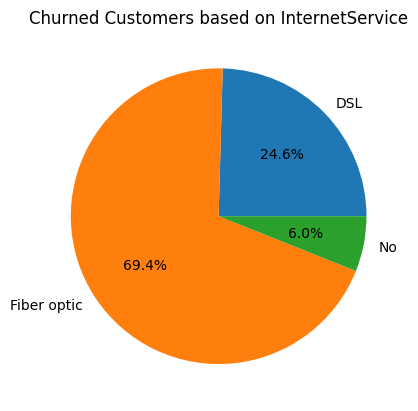

In [11]:
plt.pie(churned_cnt_based_on_is.Churnedcount,labels=churned_cnt_based_on_is.InternetService, autopct='%1.1f%%')
plt.title('Churned Customers based on InternetService')
plt.show()

In [12]:
churned_cnt_based_on_phone= df[df['Churn'] == 'Yes'].groupby('PhoneService').size().reset_index(name='Churnedcount')
churned_cnt_based_on_phone.head()

,PhoneService,Churnedcount
0,No,170
1,Yes,1699


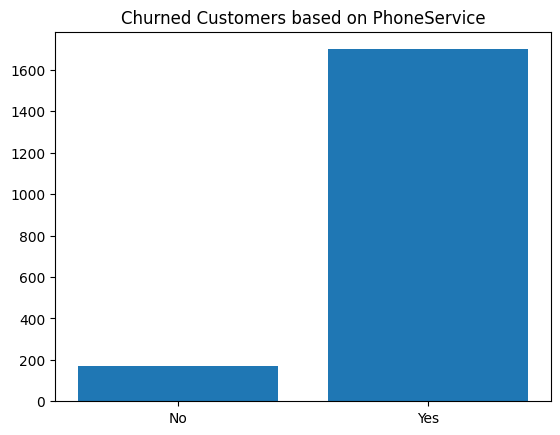

In [13]:
plt.bar(churned_cnt_based_on_phone.PhoneService,churned_cnt_based_on_phone.Churnedcount,)
plt.title('Churned Customers based on PhoneService')
plt.show()

In [14]:
churned_cnt_based_on_dependents= df.groupby(['Dependents','Churn']).size().unstack()
churned_cnt_based_on_dependents.head()

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


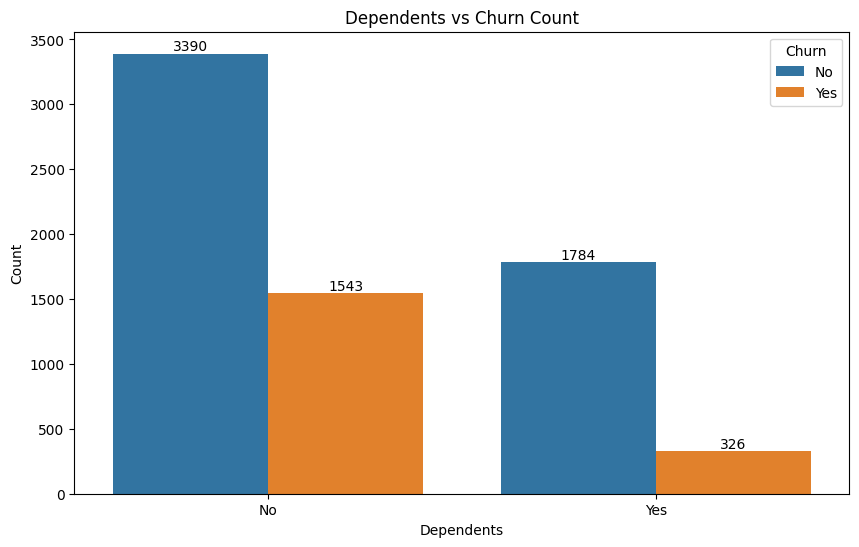

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title('Dependents vs Churn Count')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [16]:
churned_cnt_based_on_mr= df.groupby(['TechSupport','Churn']).size().unstack()
churned_cnt_based_on_mr.head()

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


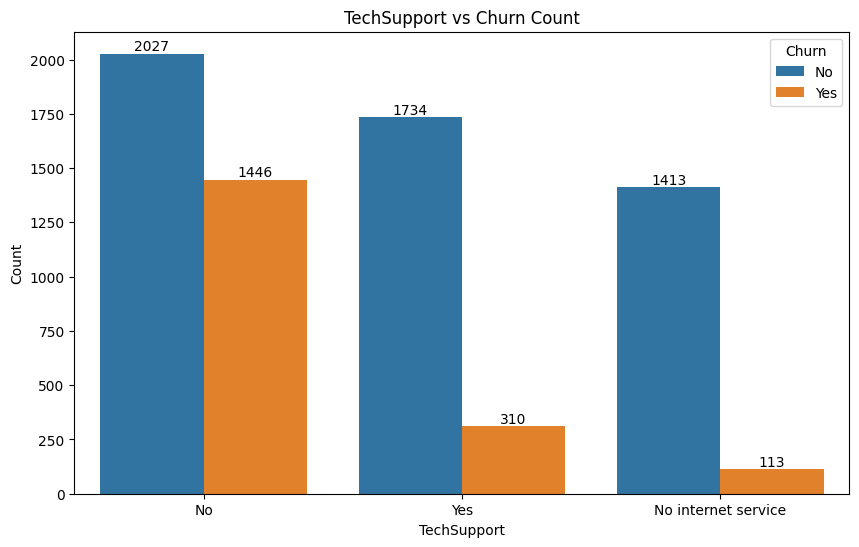

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('TechSupport vs Churn Count')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [18]:
Churned_Customers_based_on_contract = df[df['Churn'] == 'Yes'].groupby('Contract').size().reset_index(name = 'ChurnedCount')
Churned_Customers_based_on_contract.head()

,Contract,ChurnedCount
0,Month-to-month,1655
1,One year,166
2,Two year,48


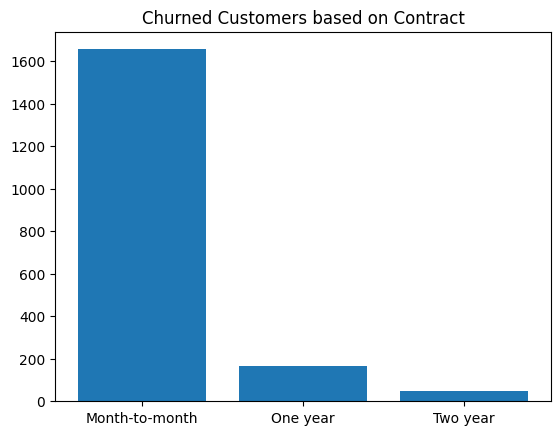

In [19]:
plt.bar(Churned_Customers_based_on_contract.Contract,Churned_Customers_based_on_contract.ChurnedCount)
plt.title('Churned Customers based on Contract')
plt.show()

In [20]:
churned_customers_based_on_services = df[df['Churn'] == 'Yes'].groupby('OnlineSecurity').size().reset_index(name = 'ChurnedCount')
churned_customers_based_on_services.head()

,OnlineSecurity,ChurnedCount
0,No,1461
1,No internet service,113
2,Yes,295


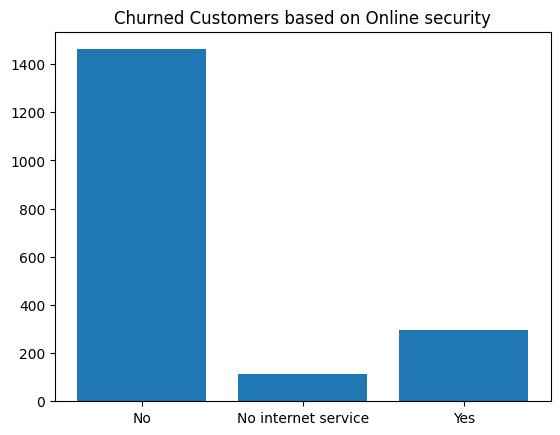

In [21]:
plt.bar(churned_customers_based_on_services.OnlineSecurity,churned_customers_based_on_services.ChurnedCount)
plt.title('Churned Customers based on Online security')
plt.show()

In [22]:
churned_customers_based_on_backup = df[df['Churn'] == 'Yes'].groupby('OnlineBackup').size().reset_index(name = 'ChurnedCount')
churned_customers_based_on_backup.head()

,OnlineBackup,ChurnedCount
0,No,1233
1,No internet service,113
2,Yes,523


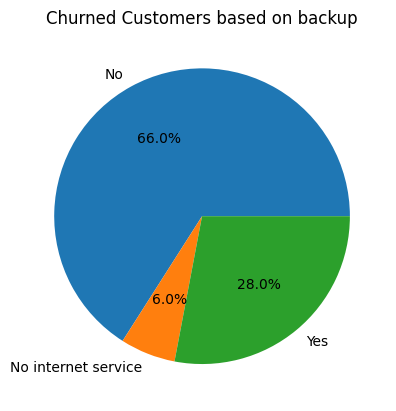

In [23]:
plt.pie(churned_customers_based_on_backup.ChurnedCount ,labels = churned_customers_based_on_backup.OnlineBackup , autopct='%1.1f%%')
plt.title('Churned Customers based on backup')
plt.show()

In [24]:
churned_customers_based_on_device_protection = df[df['Churn'] == 'Yes'].groupby('DeviceProtection').size().reset_index(name = 'ChurnedCount')
churned_customers_based_on_device_protection.head()

,DeviceProtection,ChurnedCount
0,No,1211
1,No internet service,113
2,Yes,545


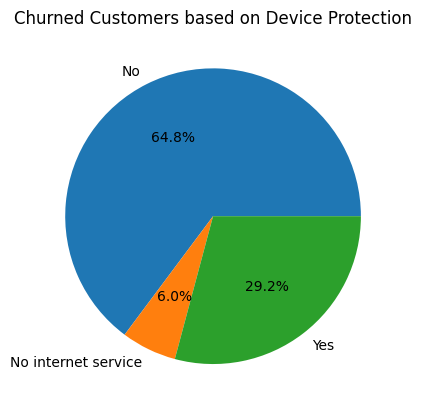

In [25]:
plt.pie(churned_customers_based_on_device_protection.ChurnedCount ,labels = churned_customers_based_on_device_protection.DeviceProtection , autopct='%1.1f%%')
plt.title('Churned Customers based on Device Protection')
plt.show()

In [26]:
churned_customers_based_on_device_pm = df.groupby(['PaymentMethod','Churn']).size().unstack()
churned_customers_based_on_device_pm.head()

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [27]:
counts_for_churns = df.groupby(['Churn']).size().reset_index(name = 'Count')
counts_for_churns.head()

,Churn,Count
0,No,5174
1,Yes,1869


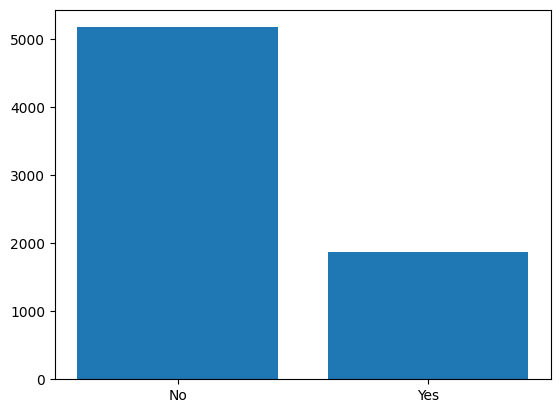

In [28]:
plt.bar(counts_for_churns.Churn,counts_for_churns.Count)
plt.show()

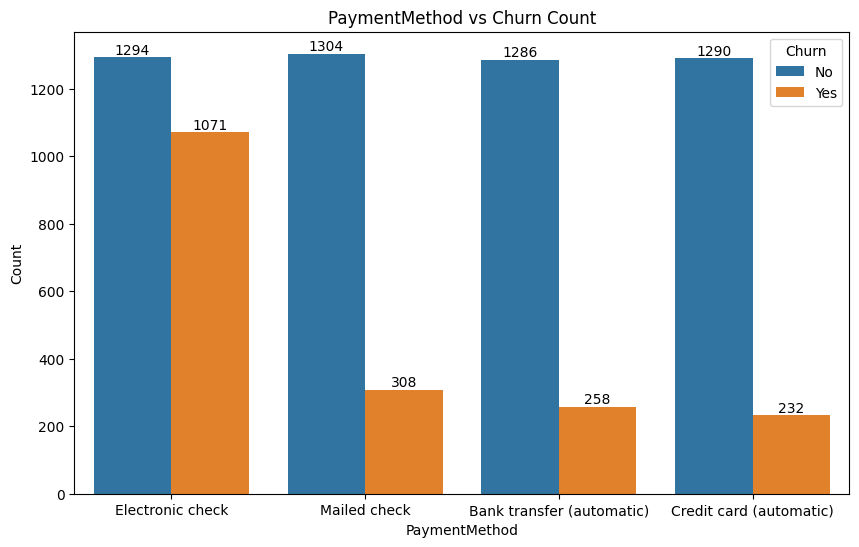

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('PaymentMethod vs Churn Count')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

C:\Users\NatarajanKumar\AppData\Local\Temp\ipykernel_16992\3848957299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StreamingServices', y='MonthlyCharges', data=df, palette='Set2')


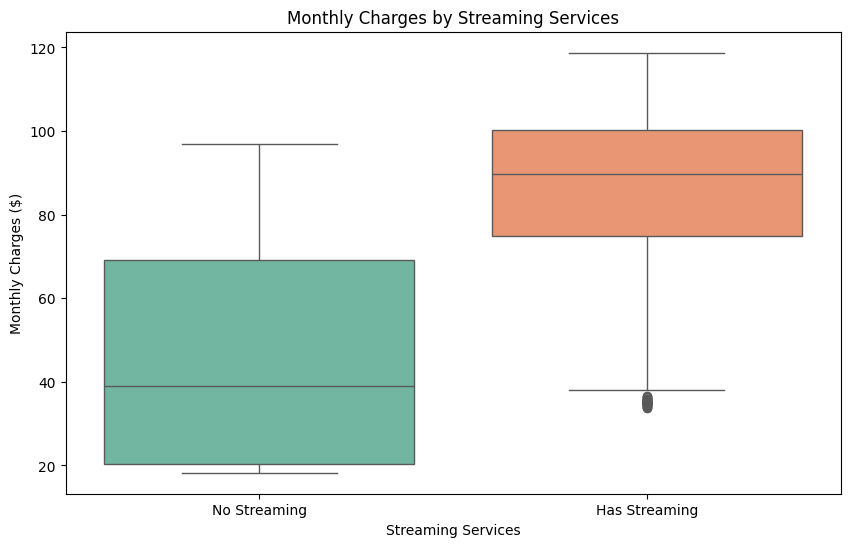

In [30]:
df['StreamingServices'] = df.apply(lambda row: 'Has Streaming' if row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes' else 'No Streaming', axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='StreamingServices', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges by Streaming Services')
plt.xlabel('Streaming Services')
plt.ylabel('Monthly Charges ($)')
plt.show()

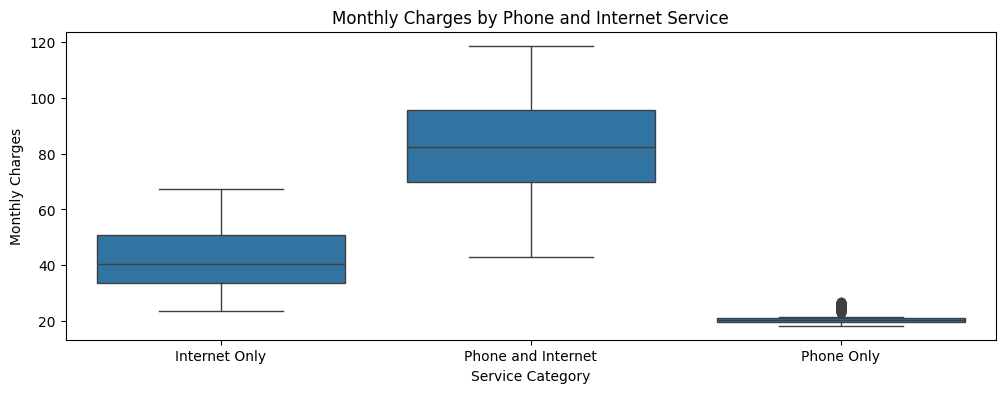

In [31]:
df['ServiceCategory'] = df.apply(lambda row: 
    'Phone Only' if row['PhoneService'] == 'Yes' and row['InternetService'] == 'No' else
    'Internet Only' if row['PhoneService'] == 'No' and row['InternetService'] != 'No' else
    'Phone and Internet', axis=1)

plt.figure(figsize=(12, 4))
sns.boxplot(x='ServiceCategory', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Phone and Internet Service')
plt.xlabel('Service Category')
plt.ylabel('Monthly Charges')
plt.show()

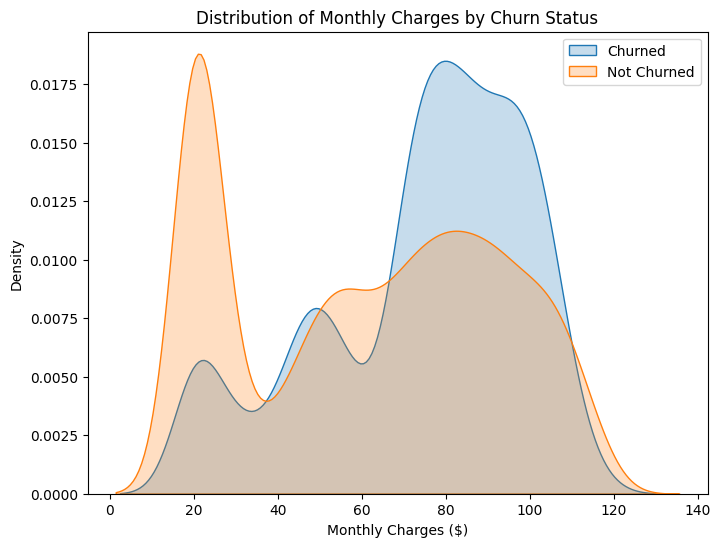

In [32]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churned', fill=True)
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='Not Churned', fill=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [33]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Streaming,Internet Only
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,No Streaming,Phone and Internet
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No Streaming,Phone and Internet
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No Streaming,Internet Only
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No Streaming,Phone and Internet


In [34]:
df.drop('customerID',axis=1,inplace =True)
df.drop('PaperlessBilling', axis=1, inplace=True)
df.drop('PaymentMethod', axis=1 , inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No,No Streaming,Internet Only
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No,No Streaming,Phone and Internet
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes,No Streaming,Phone and Internet
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No,No Streaming,Internet Only
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes,No Streaming,Phone and Internet


In [35]:
bins = [0, 12, 24, 48, float('inf')]
labels = ['New Customer', 'Mid-Term Customer', 'Long-Term Customer', 'Loyal Customer']
df['tenure_category'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,29.85,29.85,No,No Streaming,Internet Only,New Customer
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer


In [36]:
churned_customers_based_on_tenure_cat = df.groupby(['tenure_category','Churn']).size().unstack()
churned_customers_based_on_tenure_cat.head()

C:\Users\NatarajanKumar\AppData\Local\Temp\ipykernel_16992\901700845.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_customers_based_on_tenure_cat = df.groupby(['tenure_category','Churn']).size().unstack()


Churn,No,Yes
tenure_category,,
New Customer,1070,999
Mid-Term Customer,738,309
Long-Term Customer,1285,339
Loyal Customer,2081,222


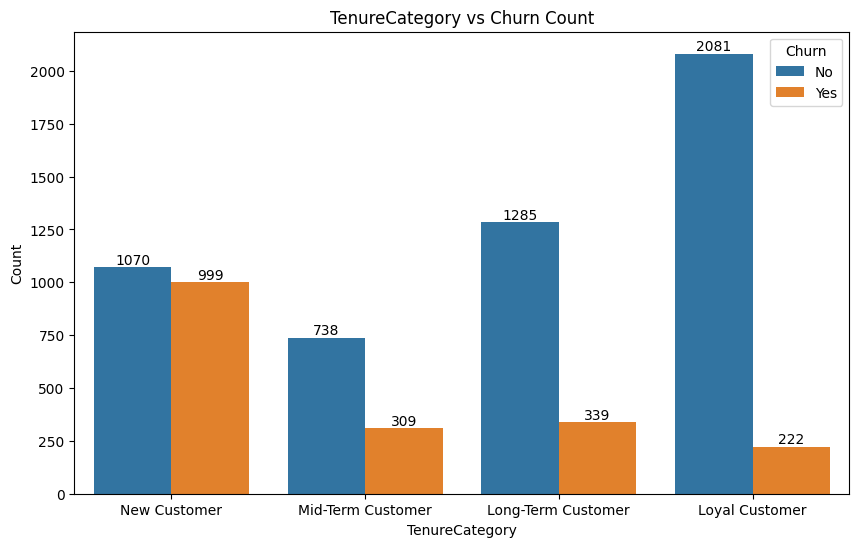

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='tenure_category', hue='Churn')
plt.title('TenureCategory vs Churn Count')
plt.xlabel('TenureCategory')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [38]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category
5503,Male,0,Yes,Yes,35,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,20.05,746.75,No,No Streaming,Phone Only,Long-Term Customer
4837,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,69.80,69.8,Yes,No Streaming,Phone and Internet,New Customer
4534,Male,0,No,No,1,Yes,No,DSL,No,No,...,Yes,No,No,Month-to-month,49.00,49,No,No Streaming,Phone and Internet,New Customer
6034,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,20.25,129.15,No,No Streaming,Phone Only,New Customer
2046,Female,0,No,Yes,1,No,No phone service,DSL,No,No,...,No,No,No,Month-to-month,24.70,24.7,No,No Streaming,Internet Only,New Customer


In [39]:
bins = [0, 50, 80, 100, float('inf')]
labels = ['Low Charges', 'Medium Charges', 'High Charges', 'Very High Charges']
df['Charges_paid_for_month'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=False)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges


In [40]:
churned_customers_based_on_monthly_charges = df.groupby(['Charges_paid_for_month','Churn']).size().unstack()
churned_customers_based_on_monthly_charges.head()

C:\Users\NatarajanKumar\AppData\Local\Temp\ipykernel_16992\954571091.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_customers_based_on_monthly_charges = df.groupby(['Charges_paid_for_month','Churn']).size().unstack()


Churn,No,Yes
Charges_paid_for_month,,
Low Charges,1933,361
Medium Charges,1474,598
High Charges,1116,653
Very High Charges,651,257


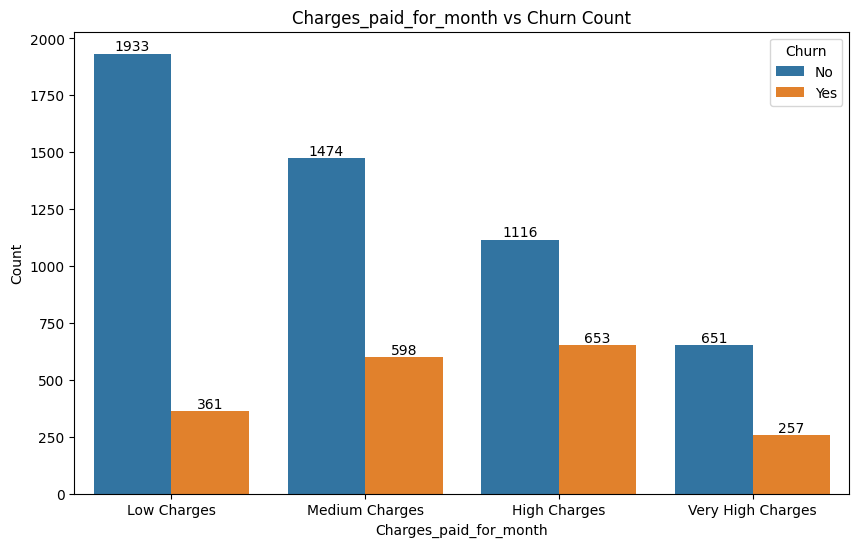

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Charges_paid_for_month', hue='Churn')
plt.title('Charges_paid_for_month vs Churn Count')
plt.xlabel('Charges_paid_for_month')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges


In [43]:
df['Online_security_new'] = df['OnlineSecurity'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges,Yes
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,No


In [44]:
df['Online_Backup_new'] = df['OnlineBackup'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new,Online_Backup_new
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges,No,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges,Yes,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,Yes,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges,Yes,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,No,No


In [45]:
df['Device_protection_new'] = df['DeviceProtection'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new,Online_Backup_new,Device_protection_new
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,No,No Streaming,Internet Only,New Customer,Low Charges,No,Yes,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.5,No,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges,Yes,No,Yes
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,Yes,Yes,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,No,No Streaming,Internet Only,Long-Term Customer,Low Charges,Yes,No,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,No,No,No


In [46]:
df['Tech_support_new'] = df['TechSupport'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new,Online_Backup_new,Device_protection_new,Tech_support_new
1837,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,20.05,Yes,No Streaming,Phone Only,New Customer,Low Charges,No,No,No,No
6708,Female,1,No,No,14,Yes,Yes,Fiber optic,No,No,...,1096.25,Yes,No Streaming,Phone and Internet,Mid-Term Customer,Medium Charges,No,No,No,No
2652,Male,0,No,No,1,Yes,No,DSL,No,No,...,55.55,No,Has Streaming,Phone and Internet,New Customer,Medium Charges,No,No,No,No
4230,Male,0,No,No,11,Yes,No,Fiber optic,Yes,No,...,791.75,Yes,No Streaming,Phone and Internet,New Customer,Medium Charges,Yes,No,No,No
2014,Male,0,Yes,Yes,13,Yes,No,DSL,No,Yes,...,750.1,No,No Streaming,Phone and Internet,Mid-Term Customer,Medium Charges,No,Yes,Yes,Yes


In [47]:
df['Multiple_lines_new'] = df['MultipleLines'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,Online_security_new,Online_Backup_new,Device_protection_new,Tech_support_new,Multiple_lines_new
706,Female,0,No,No,65,Yes,No,DSL,Yes,Yes,...,No,No Streaming,Phone and Internet,Loyal Customer,Medium Charges,Yes,Yes,No,Yes,No
4467,Female,0,Yes,No,48,Yes,Yes,DSL,No,No,...,No,Has Streaming,Phone and Internet,Loyal Customer,Medium Charges,No,No,Yes,Yes,Yes
2797,Male,0,No,No,3,Yes,Yes,Fiber optic,No,No,...,Yes,Has Streaming,Phone and Internet,New Customer,Very High Charges,No,No,Yes,No,Yes
6179,Female,1,No,No,11,Yes,Yes,Fiber optic,No,No,...,Yes,Has Streaming,Phone and Internet,New Customer,High Charges,No,No,No,No,Yes
896,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,No,Has Streaming,Phone and Internet,Loyal Customer,Very High Charges,Yes,Yes,Yes,Yes,Yes


In [48]:

encoder = LabelEncoder()
df['is_Online_security'] = encoder.fit_transform(df['Online_security_new'])
df['is_Online_backup'] = encoder.fit_transform(df['Online_Backup_new'])
df['is_Device_protection'] = encoder.fit_transform(df['Device_protection_new'])
df['is_Tech_support'] = encoder.fit_transform(df['Tech_support_new'])
df['is_Multiple_lines'] = encoder.fit_transform(df['Multiple_lines_new'])
df['Churn'] = encoder.fit_transform(df['Churn']) 
to_drop = ['Online_security_new','Online_Backup_new','Device_protection_new','Tech_support_new','Multiple_lines_new','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','tenure']
df.drop(to_drop,axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,MonthlyCharges,...,Churn,StreamingServices,ServiceCategory,tenure_category,Charges_paid_for_month,is_Online_security,is_Online_backup,is_Device_protection,is_Tech_support,is_Multiple_lines
0,Female,0,Yes,No,No,DSL,No,No,Month-to-month,29.85,...,0,No Streaming,Internet Only,New Customer,Low Charges,0,1,0,0,0
1,Male,0,No,No,Yes,DSL,No,No,One year,56.95,...,0,No Streaming,Phone and Internet,Long-Term Customer,Medium Charges,1,0,1,0,0
2,Male,0,No,No,Yes,DSL,No,No,Month-to-month,53.85,...,1,No Streaming,Phone and Internet,New Customer,Medium Charges,1,1,0,0,0
3,Male,0,No,No,No,DSL,No,No,One year,42.30,...,0,No Streaming,Internet Only,Long-Term Customer,Low Charges,1,0,1,1,0
4,Female,0,No,No,Yes,Fiber optic,No,No,Month-to-month,70.70,...,1,No Streaming,Phone and Internet,New Customer,Medium Charges,0,0,0,0,0


In [49]:
categorical_columns = ['InternetService','Contract']
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
one_hot_df = one_hot_df.astype(int)

In [ ]:
df_encoded = pd.concat([df, one_hot_df], axis=1)
 

In [51]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']    
X = pd.get_dummies(X, drop_first=True)

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# SVM Model
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Random Forest Model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# LightGBM Model
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)

print(f'Classification Report - SVM:\n{class_report}')

print(f'Classification Report - SVM:\n{class_report_svm}')   #best best best

print(f'Classification Report - Random Forest:\n{class_report_rf}')

print(f'Classification Report - LightGBM:\n{class_report_lgbm}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.81      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409

Classificat